In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import SpectralClustering
from sklearn.mixture import GaussianMixture
from umap import UMAP

RuntimeError: module compiled against API version 0xf but this version of numpy is 0xd

In [2]:
df = pd.read_csv('REM_NREM.csv')


In [3]:
exclude = df['Sleep_Stage']

scaler = MinMaxScaler()
df_norm = df.drop(columns=['Sleep_Stage'])
df_norm = pd.DataFrame(scaler.fit_transform(df_norm), columns=df_norm.columns, index=df_norm.index)

df_norm['Sleep_Stage'] = exclude

In [4]:
df_unlabeled = df.drop('Sleep_Stage', axis = 1)
df_norm_unlabeled = df_norm.drop('Sleep_Stage', axis = 1)

In [5]:
spec_clust2 = SpectralClustering(n_clusters = 2)
spec_clust4 = SpectralClustering(n_clusters = 4)

In [6]:
df_quart = pd.concat([df_norm[df_norm['Sleep_Stage'] == 'NREM'].sample(frac = 0.25), df_norm[df_norm['Sleep_Stage'] == 'REM'].sample(frac = 0.25)])

In [7]:
df_quart['preds2'] = spec_clust2.fit_predict(df_quart.drop('Sleep_Stage', axis = 1))

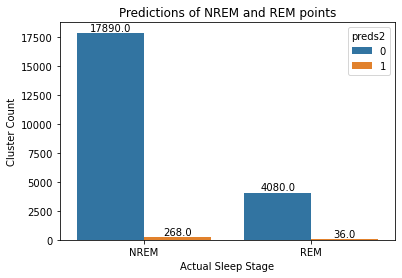

In [12]:
ax = sns.countplot(data = df_quart, x = 'Sleep_Stage', hue = 'preds2')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 5), 
                textcoords = 'offset points')

# Add title and labels
plt.title('Predictions of NREM and REM points')
plt.xlabel('Actual Sleep Stage')
plt.ylabel('Cluster Count')

# Show plot
plt.show()

In [13]:
df_quart['preds4'] = spec_clust4.fit_predict(df_quart.drop('Sleep_Stage', axis = 1))

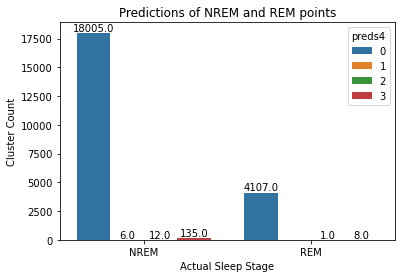

In [14]:
ax = sns.countplot(data = df_quart, x = 'Sleep_Stage', hue = 'preds4')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 5), 
                textcoords = 'offset points')

# Add title and labels
plt.title('Predictions of NREM and REM points')
plt.xlabel('Actual Sleep Stage')
plt.ylabel('Cluster Count')

# Show plot
plt.show()